# <center> <h1>Assignment 7</h1> </center>
<center> <h1>EIN 4933/6935 Python for Data Science Summer 2020</h1> </center>

You will evaluate a number of models using a data set from this <a href="http://archive.ics.uci.edu/ml/datasets.php">web-site</a>.

The data set that you choose must satisfy the following conditions:<br/>
**Attribute Characteristics** (i.e. features data type): Categorical and Numerical (i.e. Integer and/or Real)<br/>
**Associated Tasks** (i.e. prediction problem): Classification or Regression<br/>
**Number of Attributes** (i.e. features): >=10<br/>
**Number of Instances** (# of rows): >= 1000<br/>
**Missing Values?:** Yes <br/>

For example, <a href="http://archive.ics.uci.edu/ml/datasets/Adult">Adults Data Set</a> satifies the given conditions. In most cases, the data values and the set of features/response variable names are stored in different data sources. For Adults Data Set, the data values and features/response variables are located in *adult.data* and *adult.names*, respectively. You can download each files by clicking Data Folder in the given <a href="http://archive.ics.uci.edu/ml/datasets/Adult">link</a>.

Use the data set that you choose to answer the questions below. You can create as many cells as you desire for all solutions.<br/>

## Questions:
1) Choose and download a data set from the <a href="http://archive.ics.uci.edu/ml/datasets.php">link</a>. Make sure the set satisfies the above given conditions. Please note you will have to download both **.data** and **.names** files given in Data Folder web-page.<br/> 
2) Change the data values file from .data to .csv extension. This will be the csv file that you will use. This includes both data values and features/response variable names (i.e. header). For example, you can open .names file with a text editor (manually) and copy the features/response names. Or you can choose to read those names with a code.   
3) Read the data into a dataframe from csv file that you prepare in Question 2.<br/>
4) Remove any irrelevant data columns from the dataframe. If there are any missing values in the dataset, they should be replaced through a data imputation method. Any missing rows should be deleted from the dataset. Each column data type must be converted into an appropriate data type. The data types can be obtained either in .names info file.<br/>
5) Perform the following preprocessing (Feature Extraction) tasks:
a) Normalize the **numerical features** by using `MinMaxScaler` built-in function in scikit-learn package.
b) Use a One-Hot Encoder method to encode **categorical features**. You can use `get_dummies()` from Pandas Package or `DictVectorizer()` from Scikit-Learn Package or any other built-in function that you are familiar with.<br/>
6) Create two dataframes: response and features. Split these dataframes into train and test parts.<br/>
7) You will evaluate a number of models.<br/> 
a) Choose at least 3 different models from the following list:<br/>
Multiple Linear Regression, Decision Trees, Random Forest, Logistic Regression, Extreme Gradient Boosting, Categorical Gradient Boosting, Light Gradient Boosting Model, Support Vector Machines, Naïve Bayes, Nearest Neighbor or any other model that you are familiary with. All these models have built-in function available in scikit-learn package. We have covered many of them in the lectures. Make sure to use the correct model function (classifier or regressor) for your prediction problem.<br/>
In your model evaluation, make sure to follow the following steps:<br/>
b) Train the models using train part of the data.<br/>
c) Generate predictions over the test data.<br/>
d) Calculate the associated metrics (accuracy for classification problem and MAE, MSE and RMSE for regression problem) over test data by calling a built-in function from scikit learn package. <br/>
e) Report the estimated metrics in a table for each model. <br/>
8) Report the feature importance results of the best model.<br/> 
a) Create a dataframe that has two columns: one for the name of the feature and one for the associated score. Make sure to report overall feature importance of each feature. (i.e. not for each label). You can aggregate using mean of importance values reported for each label. <br/>
b) Report feature importance in a bar chart. <br/>
9) Drop at least 3 least importance features. Re-train your best model and evaluate your model by repeating the steps (b)-(e) in Question-7.<br/> 
10) Perform hyperparameter tuning with grid search for your best model. For example, the following code allows you to tune the hyperparameters of a decision tree model. The function returns the tuned parameters. You can use the same function by adjusting it for your best model. The candiate hyperparameters to be tuned can be obtained by calling `help` funciton in Python. For this specific example, you can call `help(DecisionTreeClassifier)`.

## 1) Choose and download a data set 

*First, I tried choosing the `Mushrooms` dataset, but in Step 7 my models kept getting 100% accuracy. I don't know if this was true and poisonous mushrooms are very easy to classify, or if I was doing something wrong. Either way, this would not allow me to proceed to Steps 9 and 10 so I decided to move on to another dataset. Second, I chose `Bike Share` but this did not fulfill the missing values requirement. Next I tried `Air Quality`, but I quickly realized I didn't have the domain knowledge to know what the response variable actually was. Finally, I reverted to the `Adults` dataset.*

## 2) Change the data values file from .data to .csv extension. 
This will be the csv file that you will use. This includes both data values and features/response variable names (i.e. header). For example, you can open `.names` file with a text editor (manually) and copy the features/response names. Or you can choose to read those names with code.   

## 3) Read the data into a dataframe 
from csv file that you prepared in Question 2.

In [4]:
import numpy as np
import pandas as pd


# read data and specify missing values coded as "?")
file = '../data/adult.csv'
data = pd.read_csv(file, na_values='?')

data.head(6).T

,0,1,2,3,4,5
age,39,50,38,53,28,37
workclass,State-gov,Self-emp-not-inc,Private,Private,Private,Private
fnlwgt,77516,83311,215646,234721,338409,284582
education,Bachelors,Bachelors,HS-grad,11th,Bachelors,Masters
education-num,13,13,9,7,13,14
marital-status,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse
occupation,Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty,Exec-managerial
relationship,Not-in-family,Husband,Not-in-family,Husband,Wife,Wife
race,White,White,White,Black,Black,White
sex,Male,Male,Male,Male,Female,Female


In [5]:
data.shape

(32561, 15)

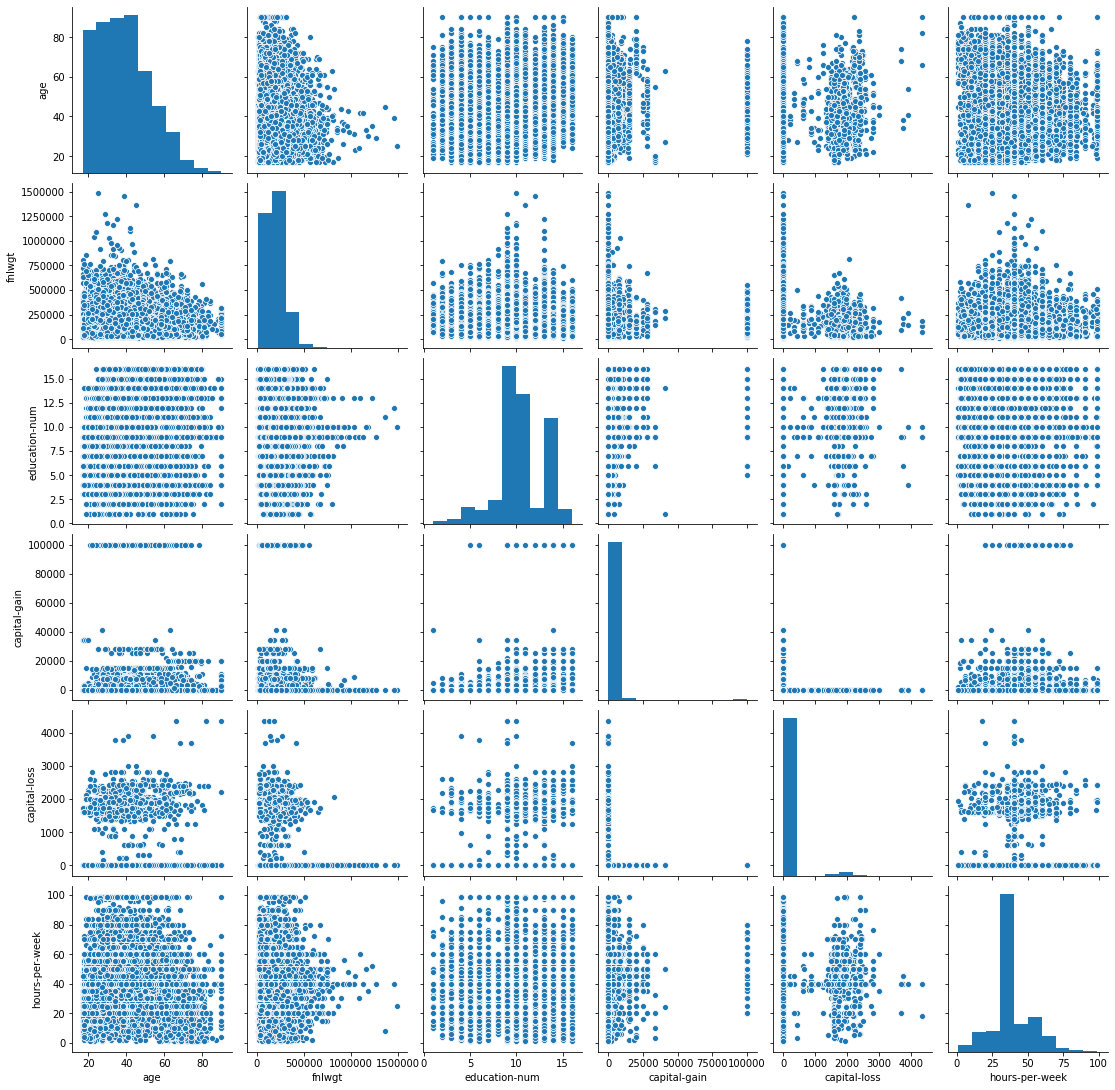

In [8]:
import seaborn as sns
sns.pairplot(data)

## 4) Remove any irrelevant data columns from the dataframe. 
If there are any missing values in the dataset, they should be replaced through a data imputation method. Any missing rows should be deleted from the dataset. Each column data type must be converted into an appropriate data type. The data types can be obtained either in `.names` file or `info()`.

#### I will keep all attributes for now.
None of the attributes seem irrelevant so I will keep them all for now.  

#### There are 1836 missing values, all in the `workclass` collumn.  
I will impute them by

#### There are 1843 missing values, all in the `occupation` collumn.  
I will impute them by

#### There are 583 missing values, all in the `native-country` collumn.  
I will impute them by

In [6]:
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [48]:
# look at the frequency of each value for the "stalk_root" column 
data.stalk_root.value_counts()

b    3776
e    1120
c     556
r     192
Name: stalk_root, dtype: int64

#### I will impute missing data in the `stalk_root` predictor based on the most common value (i.e. mode).

In [101]:
# create a new clean df to work with
df_clean = data.copy()

# impute missing values with the mode
df_clean['stalk_root'].fillna(df_clean.stalk_root.mode().astype("str")[0], inplace=True)

df_clean['stalk_root'].isna().any()

False

In [74]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   edibility            8124 non-null   object
 1   cap_shape            8124 non-null   object
 2   cap_surface          8124 non-null   object
 3   cap_color            8124 non-null   object
 4   bruises              8124 non-null   object
 5   odor                 8124 non-null   object
 6   gill_attachment      8124 non-null   object
 7   gill_spacing         8124 non-null   object
 8   gill_size            8124 non-null   object
 9   gill_color           8124 non-null   object
 10  stalk_shape          8124 non-null   object
 11  stalk_root           8124 non-null   object
 12  stalk_surface_above  8124 non-null   object
 13  stalk_surface_below  8124 non-null   object
 14  stalk_color_above    8124 non-null   object
 15  stalk_color_below    8124 non-null   object
 16  veil_t

## 5) Perform the following preprocessing (Feature Extraction) tasks:
* Normalize the **numerical features** by using `MinMaxScaler` built-in function in scikit-learn package.
* Use a One-Hot Encoder method to encode **categorical features**. You can use `get_dummies()` from Pandas Package or `DictVectorizer()` from Scikit-Learn Package or any other built-in function that you are familiar with.

#### I have 22 categorical features and 0 numerical features

In [134]:
from sklearn.preprocessing import LabelEncoder

df_clean_cap = df_clean.iloc[:,:4]

In [137]:
df_clean_cap


,edibility,cap_shape,cap_surface,cap_color
0,1,x,s,n
1,0,x,s,y
2,0,b,s,w
3,1,x,y,w
4,0,x,s,g
...,...,...,...,...
8119,0,k,s,n
8120,0,x,s,n
8121,0,f,s,n
8122,1,k,y,n


In [136]:
labelencoder = LabelEncoder()

df_clean_cap['edibility'] = labelencoder.fit_transform(df_clean_cap['edibility'])
# response = df_clean_cap['edibility']

features = df_clean_cap.drop('edibility', axis=1)
features_encoded = pd.get_dummies(features)

C:\Users\nvanb\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [138]:
features_encoded

,cap_shape_b,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_f,cap_surface_g,cap_surface_s,cap_surface_y,cap_color_b,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


## 6) Create response and features dataframes. 
Split these dataframes into **train** and **test** parts.  

In [139]:
from sklearn.model_selection import train_test_split
result_list = train_test_split(features_encoded, response, test_size=0.20, random_state=9)
features_train, features_test, response_train, response_test = result_list


In [140]:
response_train

2831    0
6228    1
3533    1
7255    0
3777    0
       ..
8118    1
501     0
6782    1
4444    0
382     0
Name: edibility, Length: 6499, dtype: int32

## 7) You will evaluate a number of models.   
a) Choose at least 3 different models from the following list:  
Multiple Linear Regression, Decision Trees, Random Forest, Logistic Regression, Extreme Gradient Boosting, Categorical Gradient Boosting, Light Gradient Boosting Model, Support Vector Machines, Naïve Bayes, Nearest Neighbor or any other model that you are familiary with. All these models have built-in function available in scikit-learn package. We have covered many of them in the lectures. Make sure to use the correct model function (classifier or regressor) for your prediction problem.  

In your model evaluation, make sure to follow the following steps:  
b) Train the models using train part of the data.  
c) Generate predictions over the test data.  
d) Calculate the associated metrics (accuracy for classification problem and MAE, MSE and RMSE for regression problem) over test data by calling a built-in function from scikit learn package.   
e) Report the estimated metrics in a table for each model.   

In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score 

In [148]:
models_list = [RandomForestClassifier(), 
               DecisionTreeClassifier(), 
               XGBClassifier(), 
               CatBoostClassifier(silent=True),
               LGBMClassifier()] # we put model functions in a list

# model names in a list
model_names = ['Random Forest', 
               'Decision Tree', 
               'Extreme Gradient Boosting', 
               'Categorical Gradient Boosting',
               'Light Gradient Boosting'] 


feature_names = features_encoded.columns.to_list()
feature_importance_df = pd.DataFrame(feature_names, columns=['features'])
accuracy_list = []

for model in range(len(models_list)):
    classifier = models_list[model]
    classifier.fit(features_train, response_train)
    response_pred = classifier.predict(features_test)
    accuracy_list.append(accuracy_score(response_pred, response_test))
    importance = classifier.feature_importances_
    feature_importance_df[model_names[model]] = importance
     
result_dict = {'Model Name':model_names, 'Accuracy':accuracy_list}

In [149]:
results_df = pd.DataFrame(result_dict)
results_df

,Model Name,Accuracy
0,Random Forest,0.720000
1,Decision Tree,0.717538
2,Extreme Gradient Boosting,0.717538
3,Categorical Gradient Boosting,0.718154
4,Light Gradient Boosting,0.717538


## 8) Report the feature importance results of the best model.  
a) Create a dataframe that has two columns: one for the name of the feature and one for the associated score. Make sure to report overall feature importance of each feature. (i.e. not for each label). You can aggregate using mean of importance values reported for each label.  
b) Report feature importance in a bar chart.  

In [150]:
feature_importance_df

,features,Random Forest,Decision Tree,Extreme Gradient Boosting,Categorical Gradient Boosting,Light Gradient Boosting
0,cap_shape_b,0.087371,0.130175,0.090338,6.305178,145
1,cap_shape_c,0.001008,0.000271,0.000000,0.037553,0
2,cap_shape_f,0.030203,0.002032,0.004277,1.988173,170
3,cap_shape_k,0.074048,0.061152,0.037136,5.031148,160
4,cap_shape_s,0.004283,0.004601,0.036931,0.471697,79
5,cap_shape_x,0.027273,0.012643,0.011432,1.312018,173
6,cap_surface_f,0.134853,0.109316,0.061204,26.643297,175
7,cap_surface_g,0.001633,0.001746,0.000000,0.054709,0
8,cap_surface_s,0.080128,0.039562,0.054913,7.970314,329
9,cap_surface_y,0.045773,0.084647,0.005825,4.999963,176


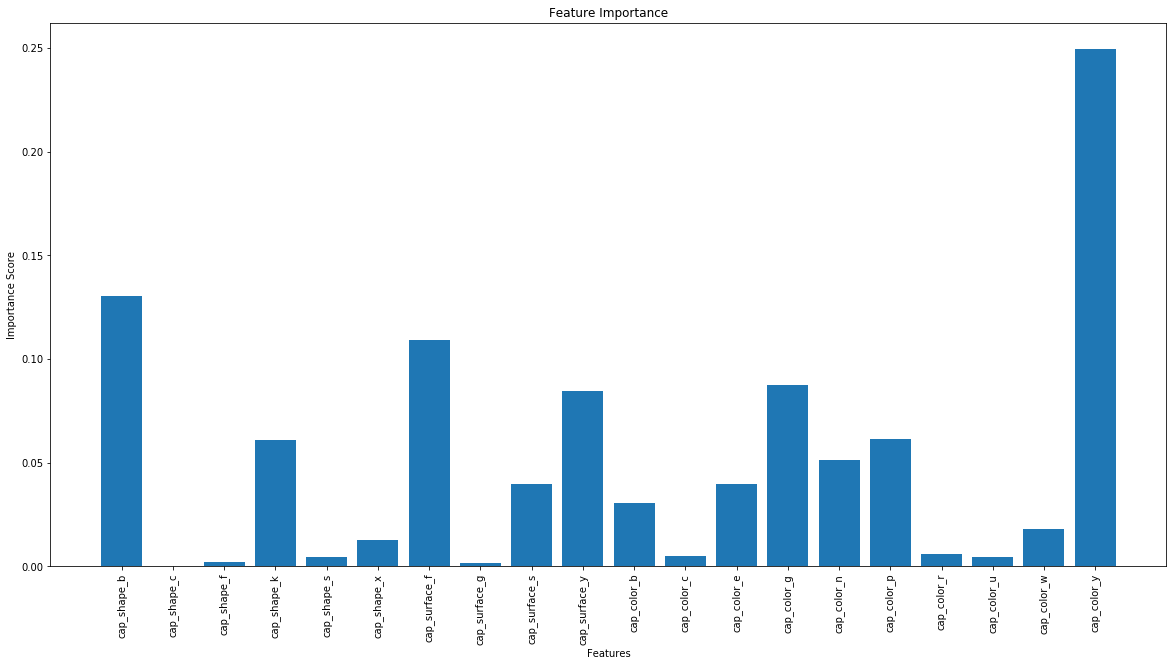

In [151]:
from matplotlib import pyplot
pyplot.figure(figsize=(20, 10))
# plot feature importance
pyplot.bar(x = list(range(len(importance))), height = feature_importance_df['Decision Tree'], tick_label = feature_names)
pyplot.title('Feature Importance')
pyplot.xlabel('Features')
pyplot.ylabel('Importance Score')
pyplot.xticks(rotation=90)
pyplot.show()

## 9) Drop at least 3 least importance features and re-train your best model.
Evaluate your model by repeating the steps (b)-(e) in Question-7.

## 10) Perform hyperparameter tuning with grid search for your best model.  
For example, the following code allows you to tune the hyperparameters of a decision tree model. The function returns the tuned parameters. You can use the same function by adjusting it for your best model. The candiate hyperparameters to be tuned can be obtained by calling `help` funciton in Python. For this specific example, you can call `help(DecisionTreeClassifier)`.

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

def grid_search(X, y, kfolds):
    
    #create a dictionary of all values we want to test
    param_grid = {'criterion':['gini','entropy'], 'max_depth': np.arange(3, 15)}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=kfolds)
    #fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

grid_search(X = features_train, y = response_train, kfolds = 5)